#### GISC 420 T1 2022
# Lab assignment 4: Doing GIS with `geopandas`

In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

## Grab the data
Three datasets are provided:

+ census population counts for Wellington City from the 2013 Census. These were obtained from [koordinates.com](https://koordinates.com) and from [stats.govt.nz](https://stats.govt.nz)
+ New Zealand road centrelines assembled by [LINZ](https://linz.govt.nz) and served by [koordinates.com](https://koordinates.com)
+ traffic accident data from [NZ Transport Agency](https://www.nzta.govt.nz/resources/road-safety-data/all/crashes/)

It is worth pointing out that I did the necessary tidying of raw datasets entirely in `geopandas` to reduce these down to the Wellington City area only, and in the case of the accidents data to focus on 2017 only!

Anyway, here they all are:

In [2]:
pop = geopandas.read_file('data/wgtn-2013-pop.geojson')
rds = geopandas.read_file('data/wgtn-roads.shp')
crashes = geopandas.read_file('data/crashes-2017.geojson')

## Take a look at the data
### First a map
Once again, a reminder of making maps in `geopandas`.

<AxesSubplot:title={'center':'General map of assignment materials'}>

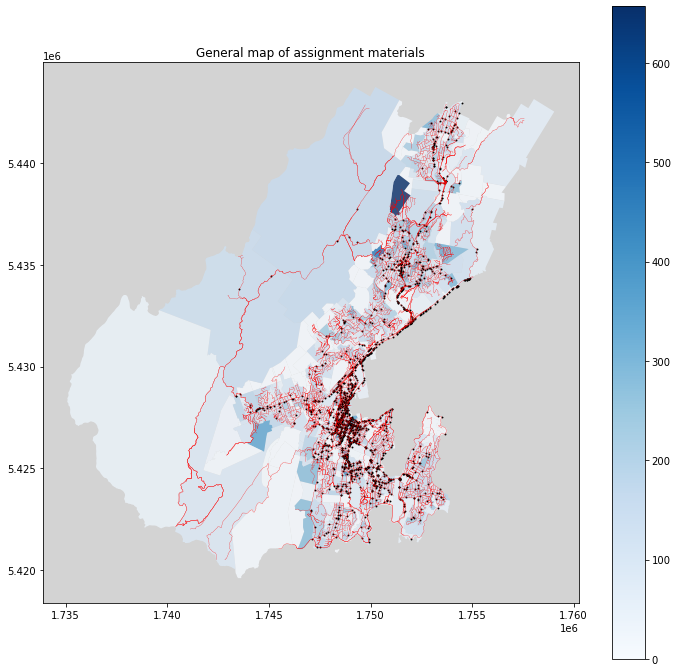

In [3]:
# Make the figure
fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# Set background colour to grey
ax.set_facecolor('lightgrey')
ax.set_title("General map of assignment materials")

# Plot meshblock populations
pop.plot(ax=ax, column='pop2013', cmap='Blues', alpha=0.8, legend=True)
# Add the roads
rds.plot(ax=ax, linewidth=0.25, color='r')
# Add the crashes
crashes.plot(ax=ax, color='k', markersize=.8)

### Then tables
Also important to examine the data tables, so that you know variable names and so on.

In [4]:
pop.head()

,OBJECTID,MB2013,AU2013,AU2013_NAM,pop2013,geometry
0,30221,1990400,572600,Tawa Central,57,"POLYGON ((1752715.127 5440817.178, 1752870.706..."
1,32856,2171003,576400,Newtown East,45,"POLYGON ((1749094.480 5424336.684, 1749100.024..."
2,32521,2142900,573400,Mt Victoria West,9,"POLYGON ((1749173.851 5426375.590, 1749190.606..."
3,32015,2104000,574702,Wilton,135,"POLYGON ((1747166.183 5429976.023, 1747153.031..."
4,32295,2124200,573000,Lambton,3,"POLYGON ((1748753.182 5428642.302, 1748818.498..."


In [5]:
rds.head()

,road_secti,length,geometry
0,1325758,11.687530,"LINESTRING (1748050.917 5431494.273, 1748061.3..."
1,1325784,307.427950,"LINESTRING (1751176.549 5434024.963, 1751163.4..."
2,1325809,153.915042,"LINESTRING (1753310.082 5439021.035, 1753382.5..."
3,1325810,157.631564,"LINESTRING (1753567.138 5438592.389, 1753581.1..."
4,1325811,15.048831,"LINESTRING (1753591.559 5439033.021, 1753606.4..."


In [6]:
crashes.head()

,CRASH_SEV,FATAL_COUN,SERIOUSINJ,MINORINJ_C,MULTI_VEH,AU_ID,MB_ID,CRASH_LOCN,CRASH_LO_1,geometry
0,F,1,0,0,Vehicle(s)+Pedestrian(s),572600,1990500,MAIN ROAD,ESSEX ST,POINT (1753096.000 5440813.000)
1,M,0,0,1,Single vehicle,573522,2086104,NASSAU AVENUE,JAMAICA DRIVE,POINT (1754055.000 5438847.000)
2,M,0,0,1,Vehicle(s)+Pedestrian(s),577200,2206200,COBHAM DRIVE,SHELLY BAY ROAD,POINT (1751588.000 5424742.000)
3,M,0,0,1,Single vehicle,573700,2082800,Z CARPARK,GOTHIC ST,POINT (1751402.000 5434774.000)
4,S,0,1,0,Single vehicle,573000,2126900,THE TERRACE,ALLENBY TERRACE,POINT (1748404.000 5427737.000)


## The assignment
This assignment challenges you to perform fairly simple GIS data manipulation using `geopandas`.

The output requested is **a map of traffic accidents per km of road at Census Area Unit level**.

You should submit a notebook to accomplish this task, including code comments, or markdown cells that explain the steps you are carrying out, as you go along.